Pickle works perfectly even with simplified graphs.

In [51]:
import osmnx as ox
import pickle 

## Cheat graph plaça cat

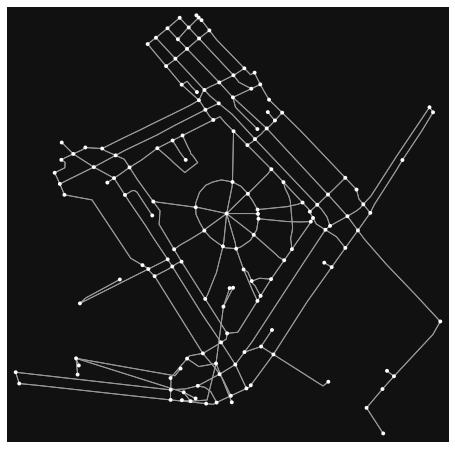

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [55]:
G_zoom_walk = ox.graph_from_address('Plaça Catalunya, Barcelona, Spain', dist = 200, network_type = 'walk')
ox.plot_graph(G_zoom_walk)

In [56]:
G_zoom_walk_proj = ox.project_graph(G_zoom_walk)

In [57]:
hwy_speeds_walk = {'residential': 4,
            'living_street': 4,
            'secondary': 4,
            'tertiary': 4,
            'service': 4,
            'pedestrian': 4}

G_zoom_walk_proj = ox.add_edge_speeds(G_zoom_walk_proj, hwy_speeds_walk)
G_zoom_walk_proj = ox.add_edge_travel_times(G_zoom_walk_proj)

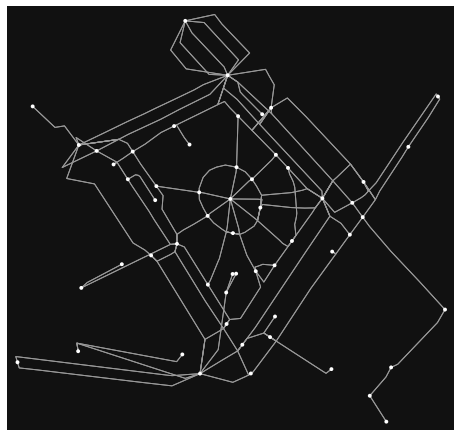

In [4]:
# Simplify the graph
G_zoom_walk_simp = ox.consolidate_intersections(ox.project_graph(G_zoom_walk), rebuild_graph=True, tolerance=8, dead_ends=True)
ax, fig = ox.plot_graph(G_zoom_walk_simp)

CPU times: user 29.6 s, sys: 256 ms, total: 29.8 s
Wall time: 1min 5s


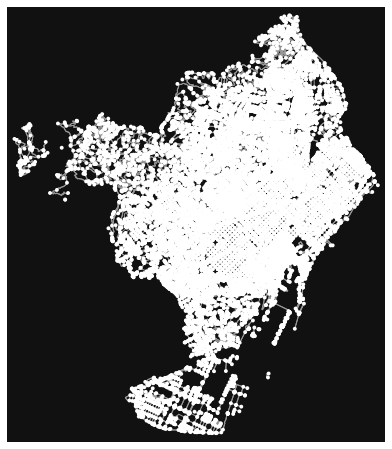

In [42]:
%time G_bike_all = ox.graph_from_place('Barcelona, Spain', network_type = 'bike', retain_all = True)
fig, ax = ox.plot_graph(G_bike_all)

In [43]:
print(len(G_bike_all.nodes))
len(G_bike_all.edges)

18461


37674

In [44]:
%time G_bike = ox.graph_from_place('Barcelona, Spain', network_type = 'bike')

CPU times: user 31.9 s, sys: 542 ms, total: 32.5 s
Wall time: 1min 49s


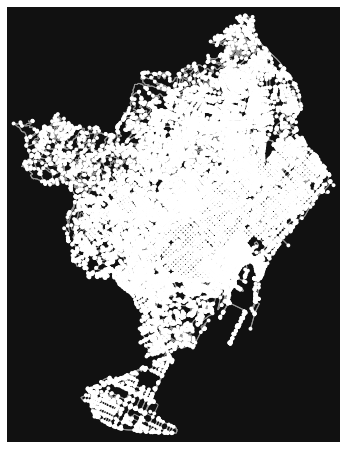

In [45]:
fig, ax = ox.plot_graph(G_bike)

In [46]:
print(len(G_bike.nodes))
len(G_bike.edges)

16953


35423

## Pickle single Graph

In [58]:
# Dump graph
with open("pickle_objects/PlaçaCat_walk_proj.p", 'wb') as f:
    pickle.dump(G_zoom_walk_proj, f)

In [48]:
with open("pickle_objects/bike.p", 'rb') as f:
    %time G_loaded = pickle.load(f)

CPU times: user 287 ms, sys: 104 ms, total: 391 ms
Wall time: 397 ms


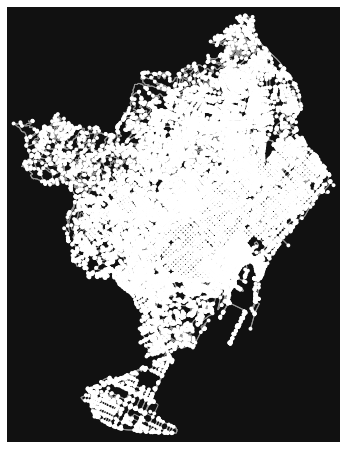

In [49]:
ax, fig = ox.plot_graph(G_loaded)

## Pickle list Graphs

In [12]:
# Dump List of graphs
l = [G_zoom_walk_simp, G_loaded]
with open("pickle_objects/ListPlaçaCat.p", 'wb') as f:
    pickle.dump(l, f)

In [13]:
# Load List of graphs
with open("pickle_objects/ListPlaçaCat.p", 'rb') as f:
    l_load = pickle.load(f)

In [15]:
l_load[0]

In [17]:
l_load[1]

# Load Road Network 

In [50]:
with open("pickle_objects/road_network.p", 'rb') as f:
    %time G_loaded = pickle.load(f)

CPU times: user 4.52 s, sys: 1.74 s, total: 6.27 s
Wall time: 6.49 s
